In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42

# Plot settings

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import MultipleLocator, FormatStrFormatter, NullFormatter
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

import seaborn
seaborn.set_context("paper")
seaborn.set(style="ticks", context="paper")

config = dict(fontsize=8)
plt.rcParams['font.size'] = config['fontsize']
#plt.rcParams['font.weight'] = "bold"
plt.rcParams['axes.labelsize'] = config['fontsize']
plt.rcParams['xtick.labelsize'] = config['fontsize']
plt.rcParams['ytick.labelsize'] = config['fontsize']
plt.rcParams['legend.fontsize'] = config['fontsize']
plt.rcParams['xtick.minor.pad'] = 1
plt.rcParams['ytick.minor.pad'] = 1

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'PT Sans'
plt.rcParams['font.monospace'] = 'PT Sans Mono'
plt.rcParams['font.size'] = 8
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 9

# Dummy data

In [3]:
n = 40
single = np.random.randn(n,n)
full = np.zeros((n*4, n*4))
for i in range(4):
    for j in range(4):
        full[i*n:(i+1)*n,j*n:(j+1)*n] = single * np.random.randn(1) + i + j*2
R = (full - full.min())
R /= R.max()

# Plot

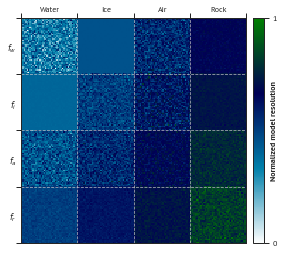

In [7]:
fig, ax = plt.subplots(figsize=(4,4))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad="3%")

im = ax.matshow(R, cmap="ocean_r")
ticks = np.linspace(-0.5, 4*40 -0.5, 5)
cbar = fig.colorbar(im, orientation="vertical", cax=cax, pad=0)
cbar.set_label(label="Normalized model resolution", labelpad=-6)
cbar.set_ticks([0, 1])
#cbar.set_ticklabels(["0", "Normalized model resolution", "1"])

ax.set_aspect("equal")
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xlim(-0.5, 4*40 - 0.5)
ax.set_ylim(-0.5, 4*40 - 0.5)

ax.invert_yaxis()
ax.xaxis.tick_top()

minorLocator = MultipleLocator(n/2)
majorFormatter = NullFormatter()
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_formatter(majorFormatter)

ax.yaxis.set_minor_locator(minorLocator)
ax.yaxis.set_major_formatter(majorFormatter)

labels = ["", "", "$f_w$", "", "$f_i$", "", "$f_a$", "", "$f_r$"]
long_labels = ["", "", "Water", "", "Ice", "", "Air", "", "Rock"]
ax.set_xticklabels(long_labels, minor=True)
ax.set_yticklabels(labels, minor=True)
ax.tick_params(axis='x',which='minor', top=False)
ax.tick_params(axis='y',which='minor', left=False) 

ax.grid(alpha=0.8, ls="--")
fig.tight_layout()
fig.savefig("/home/fwagner/src/four-phase-inversion/manuscripts/1_theory_and_implementation/Fig3_one_column.pdf", pad_inches=0, bbox_inches="tight")